In [3]:
from pipetorch.train import *
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from sklearn.metrics import f1_score
import torchvision.transforms as transforms
import torchvision.utils as vutils

In [5]:
image_size = 32
batch_size = 32

In [7]:
transform=transforms.Compose([

  transforms.Resize((image_size, image_size)),  

  transforms.ToTensor(),

  transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

])

In [9]:
# 设置训练数据集路径
train_ds_path = r'C:\Users\yil\Desktop\ipy project\bot-project\Car_deployment_2\train_ds'

# 加载训练数据集
train_ds = torchvision.datasets.ImageFolder(
    train_ds_path,  # 训练集的路径
    transform=transform
)

# 设置验证数据集路径
valid_ds_path = r'C:\Users\yil\Desktop\ipy project\bot-project\Car_deployment_2\valid_ds'

# 加载验证数据集
valid_ds = torchvision.datasets.ImageFolder(
    valid_ds_path,  # 验证集的路径
    transform=transform
)

train_ds size: 120 
valid_ds size: 30 


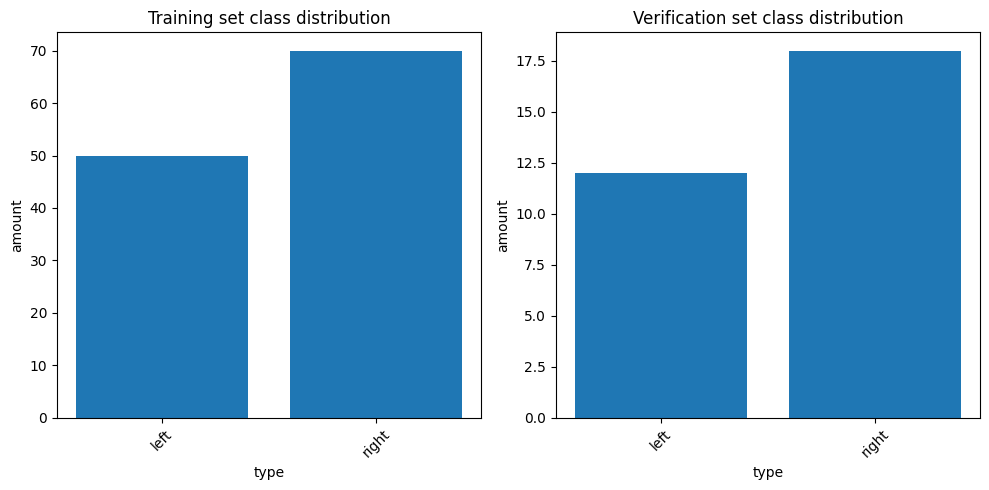

size of the picture: <built-in method size of Tensor object at 0x0000010A32253DB0>


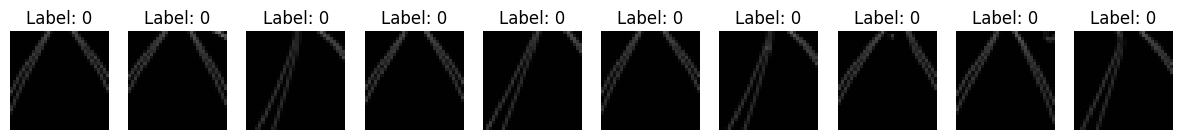

size of the picture: <built-in method size of Tensor object at 0x0000010A31A6AEA0>
shape(tuannl, height, width): (3, 32, 32)


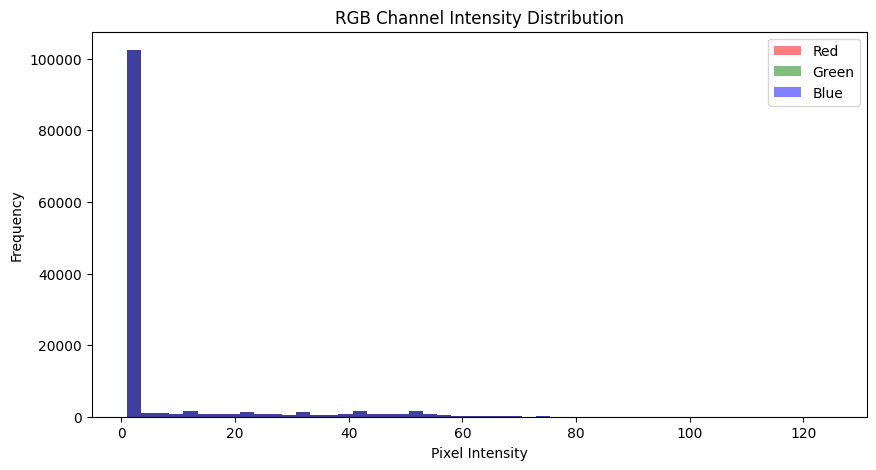

In [27]:
# 1. 查看数据集大小
train_size = len(train_ds)
valid_size = len(valid_ds)

# 2. 类别分布（统计每个类别的样本数量）
train_labels = [label for _, label in train_ds]
valid_labels = [label for _, label in valid_ds]

train_label_counts = np.bincount(train_labels)
valid_label_counts = np.bincount(valid_labels)

# 3. 图像尺寸（查看一些样本图像的尺寸）
sample_image, _ = train_ds[0]
image_size = sample_image.size  # 获取样本图像的尺寸

# 4. 展示一些样本图像
# 用于显示图像的函数
def show_random_samples(dataset, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

    # 随机选择索引
    random_indices = random.sample(range(len(dataset)), num_samples)
    
    for i, idx in enumerate(random_indices):
        image, label = dataset[idx]
        
        # 如果图像是Tensor格式，将其转换为PIL格式
        image = transforms.ToPILImage()(image)
        
        # 显示图像
        axes[i].imshow(image)
        axes[i].axis('off')  # 关闭坐标轴
        axes[i].set_title(f'Label: {label}')
    
    plt.show()# 展示5个标签类别的随机样本

# 可视化
# 1. 打印数据集大小
print(f"train_ds size: {train_size} ")
print(f"valid_ds size: {valid_size} ")

# 2. 类别分布图
categories = train_ds.classes  # 获取类别名称
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(categories, train_label_counts)
plt.title('Training set class distribution')
plt.xticks(rotation=45)
plt.xlabel('type')
plt.ylabel('amount')

plt.subplot(1, 2, 2)
plt.bar(categories, valid_label_counts)
plt.title('Verification set class distribution')
plt.xticks(rotation=45)
plt.xlabel('type')
plt.ylabel('amount')

plt.tight_layout()
plt.show()

# 3. 打印图像尺寸
print(f"size of the picture: {image_size}")

# 4. 显示一些样本图像
show_samples(train_ds, num_samples=10)

# 3. 图像的尺寸和通道数
sample_image, _ = train_ds[0]
image_size = sample_image.size  # 获取图像尺寸
image_shape = np.array(sample_image).shape  # 获取图像形状

print(f"size of the picture: {image_size}")
print(f"shape(tuannl, height, width): {image_shape}")

# 计算训练集中图像的RGB通道的均值和标准差
r_values, g_values, b_values = [], [], []

for image, _ in train_ds:
    # 将图像从Tensor转换为PIL格式
    image_pil = transforms.ToPILImage()(image)
    
    # 分离RGB通道
    r, g, b = image_pil.split()  # 现在可以使用split()方法
    
    # 将每个通道的像素值展平并保存
    r_values.extend(np.array(r).flatten())
    g_values.extend(np.array(g).flatten())
    b_values.extend(np.array(b).flatten())

# 绘制RGB通道的直方图
plt.figure(figsize=(10, 5))
plt.hist(r_values, bins=50, color='red', alpha=0.5, label='Red')
plt.hist(g_values, bins=50, color='green', alpha=0.5, label='Green')
plt.hist(b_values, bins=50, color='blue', alpha=0.5, label='Blue')
plt.title("RGB Channel Intensity Distribution")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [11]:
train_dl = DataLoader(train_ds, batch_size=batch_size,shuffle=True, num_workers=2)
valid_dl = DataLoader(valid_ds, batch_size=batch_size,shuffle=True, num_workers=2)

In [44]:
def demo_batch():
    real_batch = next(iter(train_dl))
    plt.figure(figsize=(8,8))
    plt.axis("off")
    plt.title("Training Images")
    showx(vutils.make_grid(real_batch[0][:64], padding=2, normalize=True))

In [46]:
ds = train_dl.dataset

In [48]:
X, y = next(iter(train_dl))
X.shape

torch.Size([32, 3, 32, 32])

In [49]:
def showx(x):
    plt.imshow(np.transpose(x,(1,2,0)))

In [50]:
y.shape

torch.Size([32])

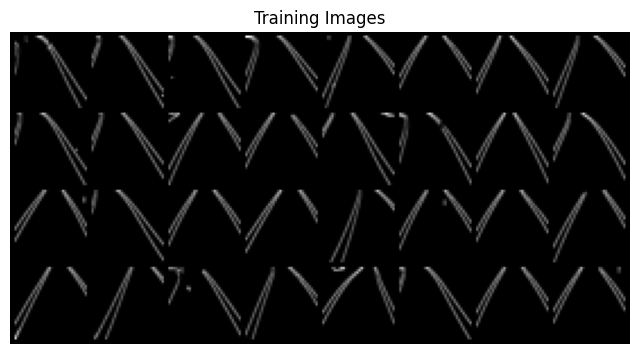

In [51]:
demo_batch()

In [13]:
def convnet1(image_size=32):
    return nn.Sequential(
        # 输入通道为 3，因为是 RGB 图像
        nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        
        # 经过一个卷积层和池化层后，特征图的大小会减半
        # image_size = 32 -> 32 // 2 = 16
        nn.Flatten(1),
        
        # 全连接层，16 * 16 * 16 = 4096
        nn.Linear(16 * 16 * 16, 2),  # 二分类任务，所以输出维度是2
    )

In [ ]:
def convnet1():
    return nn.Sequential(
        # The input has 3 channels because it's an RGB image
        nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),  # Convolutional layer
        nn.ReLU(),  # ReLU activation function
        nn.MaxPool2d(kernel_size=2, stride=2),  # Max pooling layer
        
        # After applying one convolutional layer and one pooling layer, the feature map size is halved
        # image_size = 32 -> 32 // 2 = 16
        nn.Flatten(1),  # Flatten the feature map for the fully connected layer
        
        # Fully connected layer, 16 * 16 * 16 = 4096
        nn.Linear(16 * 16 * 16, 2),  # For binary classification, so the output dimension is 2 or 3
    )


In [15]:
model = convnet1()

In [17]:
model.eval()

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Flatten(start_dim=1, end_dim=-1)
  (4): Linear(in_features=4096, out_features=2, bias=True)
)

In [60]:
# 定义损失函数，适合二分类任务的交叉熵损失
loss_fn = nn.CrossEntropyLoss()

# 假设 train_dl 和 valid_dl 是已经创建好的数据加载器
# 创建 Trainer 对象
t = Trainer(model=model, 
            loss=loss_fn, 
            train_dl=train_dl, 
            valid_dl=valid_dl, 
            metrics=accuracy_score,  # 评价标准为准确率
            halt_notebook=False)  # 是否在 notebook 中停止训练

In [62]:
t.train(20, (1e-3, 1e-2), cycle=1)

Total:   0%|          | 0/3200 [00:00<?, ?it/s]

 1 10.24s trainloss=1.37315 validloss=2.00504 accuracy_score=0.60000 
 2 8.65s trainloss=1.22313 validloss=1.41855 accuracy_score=0.50000 
 3 8.31s trainloss=1.08953 validloss=1.19377 accuracy_score=0.46667 
 4 8.59s trainloss=0.99528 validloss=1.06952 accuracy_score=0.45000 
 5 8.41s trainloss=0.93456 validloss=0.99336 accuracy_score=0.48000 
 6 8.84s trainloss=0.89351 validloss=0.94213 accuracy_score=0.50000 
 7 9.83s trainloss=0.86405 validloss=0.90530 accuracy_score=0.51429 
 8 8.85s trainloss=0.84179 validloss=0.87743 accuracy_score=0.52500 
 9 9.97s trainloss=0.82429 validloss=0.85567 accuracy_score=0.53333 
10 9.70s trainloss=0.81023 validloss=0.83819 accuracy_score=0.54000 
11 9.25s trainloss=0.79869 validloss=0.82375 accuracy_score=0.54545 
12 8.81s trainloss=0.78899 validloss=0.81163 accuracy_score=0.55000 
13 8.91s trainloss=0.78070 validloss=0.80132 accuracy_score=0.55385 
14 8.85s trainloss=0.77358 validloss=0.79239 accuracy_score=0.55714 
15 8.68s trainloss=0.76738 validl

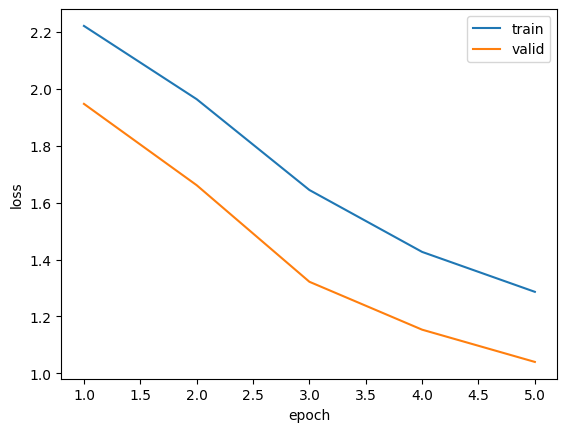

In [31]:
t.learning_curve()

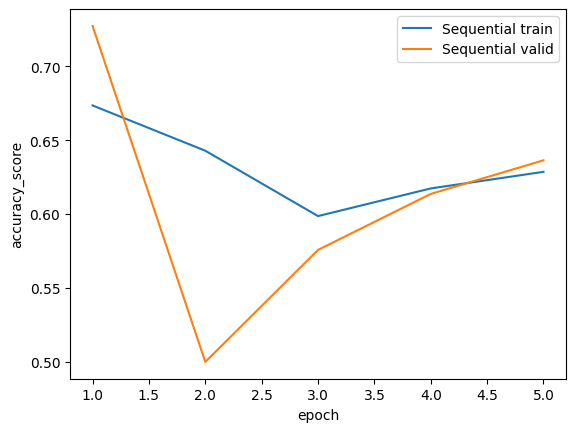

In [33]:
t.validation_curve()

In [35]:
model = model.to('cpu')  # 如果模型在 GPU 上，转移到 CPU

In [37]:
model_weights = model.state_dict()

# 保存权重到文件
torch.save(model_weights, 'model_weights.pth')

In [15]:
print("Class to Index mapping:", train_ds.class_to_idx)

Class to Index mapping: {'left': 0, 'right': 1}
